# Exam 1

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import linear_model
import statsmodels.api as sm
import statsmodels.formula.api as smf

# from sklearn.svm import SVC 
# from sklearn import tree
# # from sklearn import cross_validation
# from sklearn.model_selection import cross_validate

# from sklearn.model_selection import cross_validate
# from sklearn.model_selection import train_test_split

from sklearn import metrics
# from sklearn.ensemble import RandomForestClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor 
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import chi2

## Dataset 


Dataset "BusinessPlanData.dta" is based on simplified version of the dataset collected as part of the field experiment in Niger that is now published in American Economic Review.

The paper is: McKenzie, D. (2017). Identifying and spurring high-growth entrepreneurship: experimental evidence from a business plan competition. American Economic Review, 107(8), 2278-2307.
The paper and the full dataset can be found here: https://www.aeaweb.org/articles?id=10.1257/aer.20151404

Basically, the author runs a field experiment with a pool of entrepreneurs applying to a national business plan competition in Nigeria. The last stage of the selection process randomly selected 720 semi-finalists (out of 1,920 semi-finalists) to win the business plan program. The program consisted of an initial four-day training, a grant paid in four tranches, some mentoring, and two additional two-day training events. The entrepreneurs were then tracked through surveys over a period of five years.
The paper basically compares the group of semi-finalists randomly allocated to the business plan treatment (called ‘treatment’ group) to the control group of all the other semi-finalists who were not allocated to the business plan program.
The published paper looks at whether the business plan treatment had any significant effect on firms’ (self-reported) survival, profits, sales, and employment, but it also contains data on how many hours the entrepreneurs reported to work in their business in a usual week three years after the business plan competition.

Our main variable of interest (the dependent variable) for the task is the variable ‘hoursusualweek’, a continuous variable counting the number of hours that the entrepreneurs worked in a normal week three years after the intervention.

### Load BusinessPlanData data in dta format and assign it to a variable 
Hint: It is not mandatory to convert categoricals

In [2]:
data = pd.read_stata('BusinessPlanData.dta', convert_categoricals=False)

In [3]:
data.shape

(1841, 80)

### Drop the columns where the type is object 

In [4]:
# data.select_dtypes(include='object').columns.values

In [5]:
data.drop(columns=data.select_dtypes(include='object').columns.values, inplace=True)

### Drop the rows where "hoursusualweek" column is nan 

In [6]:
data = data.dropna(subset=['hoursusualweek'])

In [7]:
data.shape

(918, 74)

### Drop the columns where input contains nan 

In [8]:
data.dropna(axis=1, inplace=True)

In [9]:
data.shape

(918, 58)

### Drop the columns which names contain "id" string 

In [10]:
data = data[data.columns.drop(list(data.filter(regex='id')))]

In [11]:
data.shape

(918, 55)

### Scale "revenues" feature to [0,10] range using Min Max Scaler 

In [12]:
minmax_scale = MinMaxScaler(feature_range=(0,10)).fit(data[['revenues']])
data.revenues = minmax_scale.transform(data[['revenues']])

### Use Linear Regression and VIF to drop correlated features. For VIF threshold use 5

In [13]:
def calculate_vif_(X, thresh=5.0):
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
               for ix in range(X.iloc[:, variables].shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X.iloc[:, variables].columns[maxloc] +
                  '\' at index: ' + str(maxloc))
            del variables[maxloc]
            dropped = True

    print('Remaining variables:')
    print(X.columns[variables])
    return X.iloc[:, variables]

In [14]:
# data_new = calculate_vif_(data)

In [15]:
y = data.hoursusualweek
X = data.drop(axis=1, columns=['hoursusualweek'])

In [16]:
model1 = sm.OLS(y, X).fit()

In [17]:
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:         hoursusualweek   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     35.08
Date:                Sat, 13 Apr 2019   Prob (F-statistic):          1.46e-171
Time:                        15:00:40   Log-Likelihood:                -3650.5
No. Observations:                 918   AIC:                             7401.
Df Residuals:                     868   BIC:                             7642.
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
passfirstround  

From the above obtained summary we see that there is a strong correlation between features, because the smallest eigenvalue is 1.65e-27. This might indicate that there are strong multicollinearity problems or that the design matrix is singular. So we will use VIF to avoid that problem.

In [18]:
X = calculate_vif_(X)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1543: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


dropping 'female' at index: 1
dropping 'northcentral' at index: 2
dropping 'highschooledn' at index: 8
dropping 'new' at index: 13
dropping 'passfirstround' at index: 0
dropping 'age' at index: 6
dropping 'totalmark' at index: 10
dropping 'computer_skills' at index: 13
dropping 'totalmarks' at index: 41
dropping 'have_televisions' at index: 37
dropping 'marital_status' at index: 15
dropping 'male' at index: 0
dropping 'have_genrators' at index: 32
dropping 'have_dvd_players' at index: 35
dropping 'university' at index: 6
dropping 'marketing_training' at index: 10
dropping 'business_sector' at index: 11
Remaining variables:
Index(['northeastern', 'northwestern', 'southeastern', 'southsouth',
       'southwestern', 'polytechnic', 'postgraduate', 'missingedn', 'existing',
       'business_accounting_training', 'vocational_training',
       'number_of_children', 'number_of_brothers', 'number_of_sisters',
       'lived_worked_abroad', 'have_internet', 'have_agricultural',
       'have_sewin

In [19]:
model_after_VIF = sm.OLS(y, X).fit()

In [20]:
print(model_after_VIF.summary())

                            OLS Regression Results                            
Dep. Variable:         hoursusualweek   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     324.0
Date:                Sat, 13 Apr 2019   Prob (F-statistic):               0.00
Time:                        15:00:47   Log-Likelihood:                -3683.9
No. Observations:                 918   AIC:                             7442.
Df Residuals:                     881   BIC:                             7620.
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
northeastern    

### Find the feature that has biggest Pearson correlation with dependent variable ("hoursusualweek") 

In [32]:
#get the first inside about the dataset
#most correlated features
corrmat = data.corr()
top_corr_features = corrmat.index[abs(corrmat["hoursusualweek"])>0]
plt.figure(figsize=(10,10))
sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [33]:
top_corr_features.sort_values(ascending=False)[:1]

Index(['vocational_training'], dtype='object')

### Plot Heatmap 

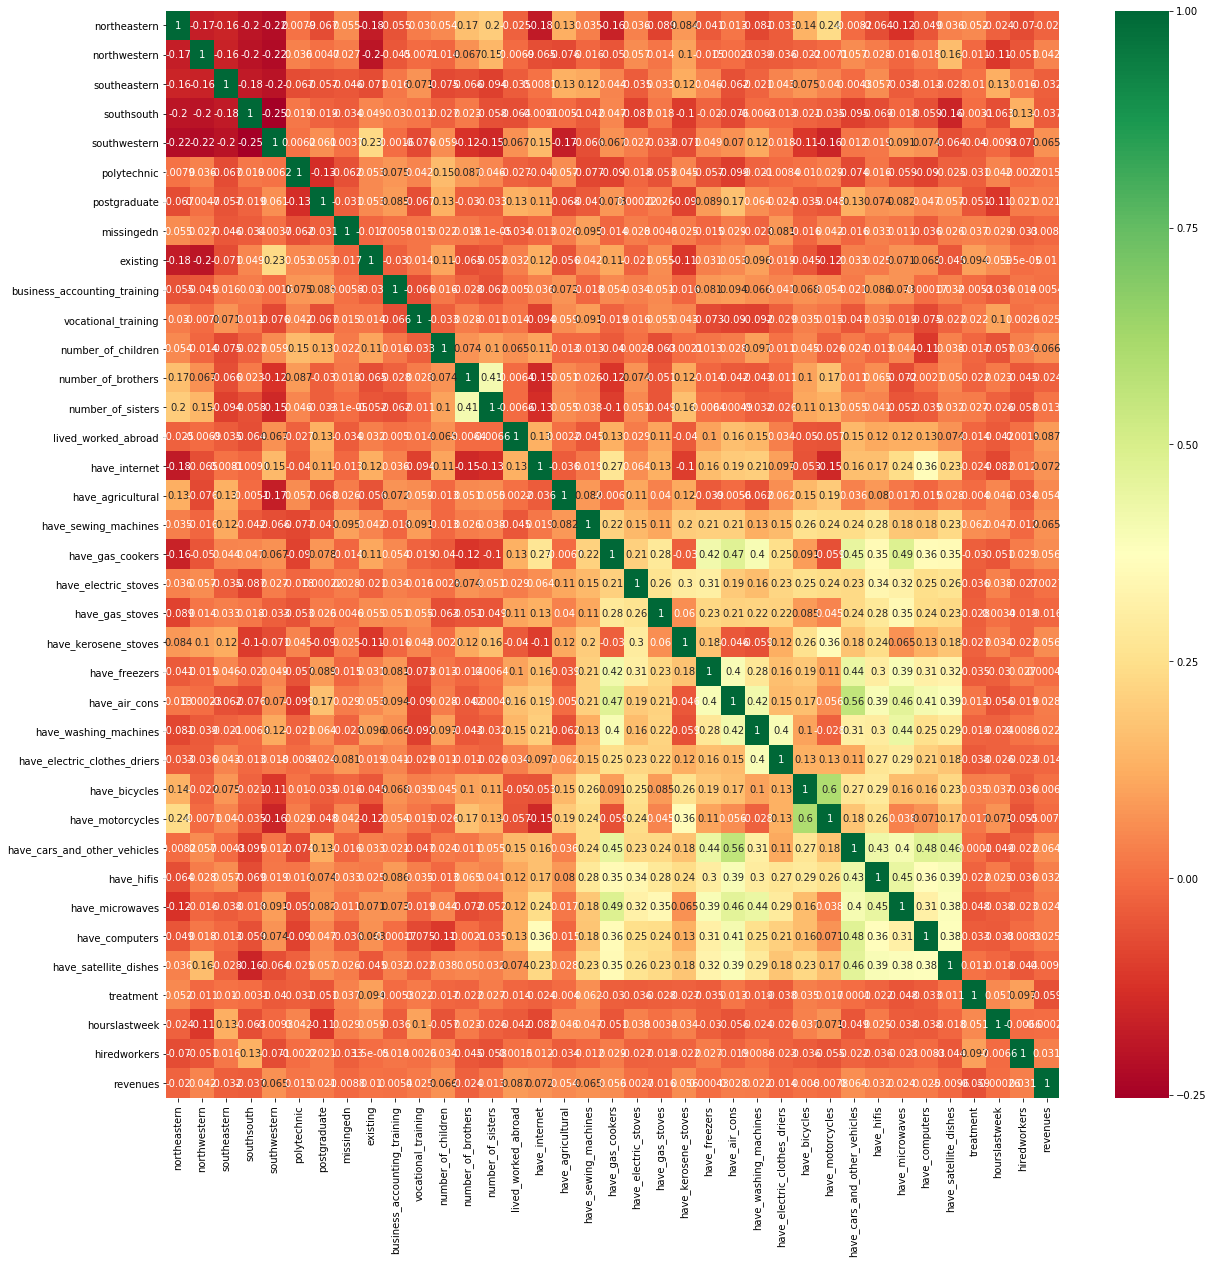

In [23]:
corrmat = X.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# Exercise 2

In [24]:
import scipy.stats as stats

In [25]:
obs = np.array([[141, 161, 298, 133, 128, 204],[348, 366, 309, 222, 272, 326], [381, 334, 219, 311, 322, 316], [217, 215, 219, 443, 389, 174] ])

In [26]:
stats.chi2_contingency(observed=obs)

(425.40626697007184,
 3.1333809459453315e-81,
 15,
 array([[179.53706576, 177.72022333, 172.60003102, 183.17075062,
         183.50108561, 168.47084367],
        [310.69184243, 307.54776675, 298.68718983, 316.9799938 ,
         317.55164392, 291.54156328],
        [317.43501861, 314.22270471, 305.1698201 , 323.8596464 ,
         324.44370347, 297.8691067 ],
        [279.3360732 , 276.50930521, 268.54295906, 284.98960918,
         285.503567  , 262.11848635]]))

In [27]:
stats.chi2.ppf(q=0.95, df=15)

24.995790139728616